In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
df = pd.read_csv('DATASET_RIOSAVILA_EC1.csv', sep=',')

In [12]:
df.head(10)

,ID,THINCKNESS,SIZE,SHAPE,ADHESION,SINGLE,NUCLEI,CHROMATIN,NUCLEOLI,MITOSIS,RESULT
0,1000025.0,5,1,1,1,2,1.0,3,1,1,0
1,1002945.0,5,4,4,5,7,10.0,3,2,1,0
2,1015425.0,3,1,1,1,2,2.0,3,1,1,0
3,1016277.0,6,8,8,1,3,4.0,3,7,1,0
4,1017023.0,4,1,1,3,2,1.0,3,1,1,0
5,1017122.0,8,10,10,8,7,10.0,9,7,1,1
6,1018099.0,1,1,1,1,2,10.0,3,1,1,0
7,1018561.0,2,1,2,1,2,1.0,3,1,1,0
8,1033078.0,2,1,1,1,2,1.0,1,1,5,0
9,1033078.0,4,2,1,1,2,1.0,2,1,1,0


In [13]:
df.describe()

,ID,THINCKNESS,SIZE,SHAPE,ADHESION,SINGLE,NUCLEI,CHROMATIN,NUCLEOLI,MITOSIS,RESULT
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


Precisión del modelo SVM: 0.96

Reporte de clasificación:

              precision  recall  f1-score  support
0                  0.95    0.99      0.97    79.00
1                  0.98    0.93      0.96    58.00
accuracy           0.96    0.96      0.96     0.96
macro avg          0.97    0.96      0.96   137.00
weighted avg       0.96    0.96      0.96   137.00


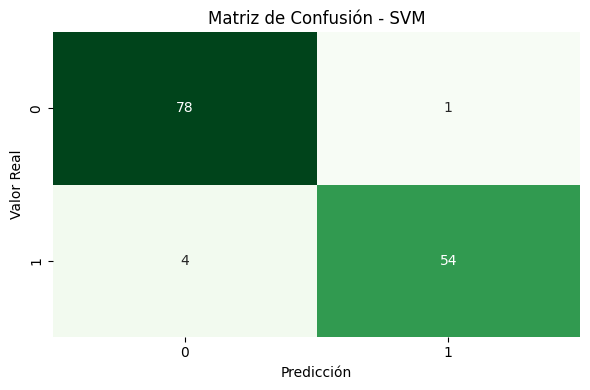

In [14]:
# Separar características (X) y etiqueta (y)
X = df.drop('RESULT', axis=1)
y = df['RESULT']

# Dividir en conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predicción y evaluación
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Mostrar la exactitud con 2 decimales
print(f"Precisión del modelo SVM: {accuracy:.2f}\n")

# Convertir el classification report en DataFrame y redondear
report_df = pd.DataFrame(report).transpose().round(2)

# Mostrar el reporte como tabla
print("Reporte de clasificación:\n")
print(report_df)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Gráfico de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - SVM')
plt.tight_layout()
plt.show()